# Intro to Business Analytics (CM1706)
# Assessment 2
## Diana Shand (1216527)

In [177]:
# import required libraries
# import dataframe

import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

dfsolar = pd.read_csv('solar.csv')

In [178]:
# display dataframe so we can confirm import has worked

display (dfsolar)

,powergen,latitude,temp,humidity,cloudcov,pressure,panels,date,location,snowing,smart
0,1.570,56.9N,-9.8,16.12,99.9,999.7,6,01-January-2023,urban,No,No
1,0.440,41N,10.5,32.79,90.5,997.6,3,01-January-2023,urban,No,No
2,2.740,55.5N,3.2,25.11,95.3,999.9,9,01-January-2023,urban,No,Semi
3,1.296,40N,-5.2,38.49,92.1,994.7,6,01-January-2023,urban,Yes,AI
4,1.854,47.5N,-0.2,41.94,97.3,1001.0,5,01-January-2023,urban,Yes,Semi
...,...,...,...,...,...,...,...,...,...,...,...
1511,4.200,59.8N,19.0,38.86,2.7,975.4,6,12-June-2023,rural,No,No
1512,7.721,58.8N,2.4,68.43,0.0,1039.6,7,12-June-2023,urban,No,AI
1513,4.990,63.3N,31.9,13.65,34.2,976.9,8,12-June-2023,rural,No,No
1514,6.919,45.5N,23.6,25.26,0.0,990.5,8,12-June-2023,urban,No,AI


---
## Data Cleaning and Transformation Tasks:


### 1. Identify which columns in the dataset have missing data values.

Remove or replace the missing values (justifying your approach for each variable concerned).

In [179]:
# Establish which columns in the table have missing values

dfsolar.isna().sum()

powergen     0
latitude     0
temp         0
humidity     0
cloudcov     0
pressure    32
panels       0
date         0
location     0
snowing     16
smart        0
dtype: int64


* Output confirms there are 32 missing values under <b>'pressure'</b> column and 16 missing values under <b>'snowing'</b> column

<b>For snowing</b>
* Could produce a frequency table and determine if 16 missing values are, on average, more likely to be Yes or No.
* <b>In this instance, it should not have a massive impact on 1,516 rows if 16 are removed - so chose to delete.</b>



In [180]:
# Remove rows that have na in 'snowing' column
# Check which columns then have missing values to ensure this has worked

dfsolar.dropna(subset=['snowing'], inplace=True)
dfsolar.isna().sum()

powergen     0
latitude     0
temp         0
humidity     0
cloudcov     0
pressure    32
panels       0
date         0
location     0
snowing      0
smart        0
dtype: int64

It can be seen there are no missing values now present in the 'snow' column

<b> For Pressure </b>

* I don't want to remove another 32 rows if possible.

* <b>In this instance will establish mean for missing values, 32 mean values would have less significant impact on overall data</b>

In [181]:
# Add average values where no value is present in cell for 'pressure' 
# Check which columns then have missing values to ensure this has worked

dfsolar.fillna({'pressure': dfsolar['pressure'].mean()}, inplace=True)
dfsolar.isna().sum()

powergen    0
latitude    0
temp        0
humidity    0
cloudcov    0
pressure    0
panels      0
date        0
location    0
snowing     0
smart       0
dtype: int64

It can be seen there are no missing values now present in the 'pressure' column

---
### 2. Identify and remove any duplicate rows in the dataset solar.csv.

In [182]:
# Check if there are duplicated rows in the table
dfsolar.duplicated().sum()

10

In [183]:
# Identify and display these rows

dfsolar[dfsolar.duplicated()]

,powergen,latitude,temp,humidity,cloudcov,pressure,panels,date,location,snowing,smart
66,1.91,37.9N,-8.9,39.295,99.6,1007.1,7,06-January-2023,urban,No,No
215,2.59,56.5N,4.8,54.900,83.9,993.2,8,21-January-2023,urban,No,No
309,3.92,58.2N,7.0,13.440,74.9,995.1,8,31-January-2023,rural,No,No
398,3.30,45.1N,7.9,22.800,90.6,1010.9,8,09-February-2023,urban,No,Semi
407,4.34,60.5N,-7.1,47.800,48.6,1007.8,9,10-February-2023,rural,No,Semi
622,3.89,45.7N,7.1,24.720,87.4,1001.7,9,07-March-2023,rural,No,Semi
706,5.18,64.6N,2.2,21.600,32.4,990.7,9,17-March-2023,rural,No,No
1001,3.35,54.4N,-0.6,97.890,93.8,987.1,10,19-April-2023,urban,No,No
1047,2.37,35.8N,15.7,54.840,0.4,991.6,5,25-April-2023,urban,No,No
1258,3.40,55.6N,5.8,70.890,99.6,1020.4,6,17-May-2023,urban,No,No


In [184]:
# Remove duplicated rows
# Check to find out if any duplicated rows still exist in table

dfsolar.drop_duplicates(inplace = True)
dfsolar.duplicated().sum()

0

It is confirmed there are no longer duplicated rows in the table

---
### 3. The latitude column is initially in text format, due to the symbol 'N'.
Process this column to remove the symbol and hence convert latitude into a numerical variable.

In [185]:
# View the latitude column to see how N is included

dfsolar['latitude']

0       56.9N
1         41N
2       55.5N
3         40N
4       47.5N
        ...  
1511    59.8N
1512    58.8N
1513    63.3N
1514    45.5N
1515    51.8N
Name: latitude, Length: 1490, dtype: object

In [186]:
# Remove N from the string in latitude column and replace with empty string
# Check information for dataframe - latitude should now be classed as a float

dfsolar['latitude'] = dfsolar['latitude'].str.replace('N', '').astype (float)
dfsolar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, 0 to 1515
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   powergen  1490 non-null   float64
 1   latitude  1490 non-null   float64
 2   temp      1490 non-null   float64
 3   humidity  1490 non-null   float64
 4   cloudcov  1490 non-null   float64
 5   pressure  1490 non-null   float64
 6   panels    1490 non-null   int64  
 7   date      1490 non-null   object 
 8   location  1490 non-null   object 
 9   snowing   1490 non-null   object 
 10  smart     1490 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 139.7+ KB


Latitude now classed as float

---
### 4. Create a new column in your data frame called powerPerPanel.
This should be calculated by the formula: powerPerPanel = powergen / panels


In [187]:
# Create column incorporating formula required
# Display dataframe to ensure it has been added and works as it should

dfsolar['powerPerPanel'] = round (dfsolar['powergen']/dfsolar['panels'], 3)
dfsolar

,powergen,latitude,temp,humidity,cloudcov,pressure,panels,date,location,snowing,smart,powerPerPanel
0,1.570,56.9,-9.8,16.12,99.9,999.7,6,01-January-2023,urban,No,No,0.262
1,0.440,41.0,10.5,32.79,90.5,997.6,3,01-January-2023,urban,No,No,0.147
2,2.740,55.5,3.2,25.11,95.3,999.9,9,01-January-2023,urban,No,Semi,0.304
3,1.296,40.0,-5.2,38.49,92.1,994.7,6,01-January-2023,urban,Yes,AI,0.216
4,1.854,47.5,-0.2,41.94,97.3,1001.0,5,01-January-2023,urban,Yes,Semi,0.371
...,...,...,...,...,...,...,...,...,...,...,...,...
1511,4.200,59.8,19.0,38.86,2.7,975.4,6,12-June-2023,rural,No,No,0.700
1512,7.721,58.8,2.4,68.43,0.0,1039.6,7,12-June-2023,urban,No,AI,1.103
1513,4.990,63.3,31.9,13.65,34.2,976.9,8,12-June-2023,rural,No,No,0.624
1514,6.919,45.5,23.6,25.26,0.0,990.5,8,12-June-2023,urban,No,AI,0.865


---
### 5(i). The date variable is a string. Process date so that it is transformed into a variable with Python data type datetime


In [188]:
# Convert data in 'date' column to datetime
# Check the data type is now datetime

dfsolar['date'] = pd.to_datetime( dfsolar['date'] )
dfsolar.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, 0 to 1515
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   powergen       1490 non-null   float64       
 1   latitude       1490 non-null   float64       
 2   temp           1490 non-null   float64       
 3   humidity       1490 non-null   float64       
 4   cloudcov       1490 non-null   float64       
 5   pressure       1490 non-null   float64       
 6   panels         1490 non-null   int64         
 7   date           1490 non-null   datetime64[ns]
 8   location       1490 non-null   object        
 9   snowing        1490 non-null   object        
 10  smart          1490 non-null   object        
 11  powerPerPanel  1490 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 151.3+ KB


In [189]:
# Check 'date' column to see how the data in the column currently appears

dfsolar['date']

0      2023-01-01
1      2023-01-01
2      2023-01-01
3      2023-01-01
4      2023-01-01
          ...    
1511   2023-06-12
1512   2023-06-12
1513   2023-06-12
1514   2023-06-12
1515   2023-06-12
Name: date, Length: 1490, dtype: datetime64[ns]

---
### 5(ii). Hence create a new data frame column called Month which should be the month of the year in shorthand month (Jan, Feb, ..., Dec)

In [190]:
# New column will be called 'month'
# Extract required component from datetime and format into shorthand

dfsolar['month'] = dfsolar['date'].dt.strftime('%b')

In [191]:
# Display new column to ensure it is showing correct data

dfsolar['month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
1511    Jun
1512    Jun
1513    Jun
1514    Jun
1515    Jun
Name: month, Length: 1490, dtype: object

---
## Statistics of individual variables:

Summarise the data by calculating relevant statistics, creating relevant visualisations of their distributions 
and commenting on the results and any interesting features for each variable.

---
### 6. Numerical variables: 


### Powergen

min =  0.32 
max =  7.72 
mean =  3.78 
median =  3.72 
first quartile =  2.96 
last quartile =  4.6 
standard deviation =  1.23 
skew =  0.18 
kurtosis =  -0.03


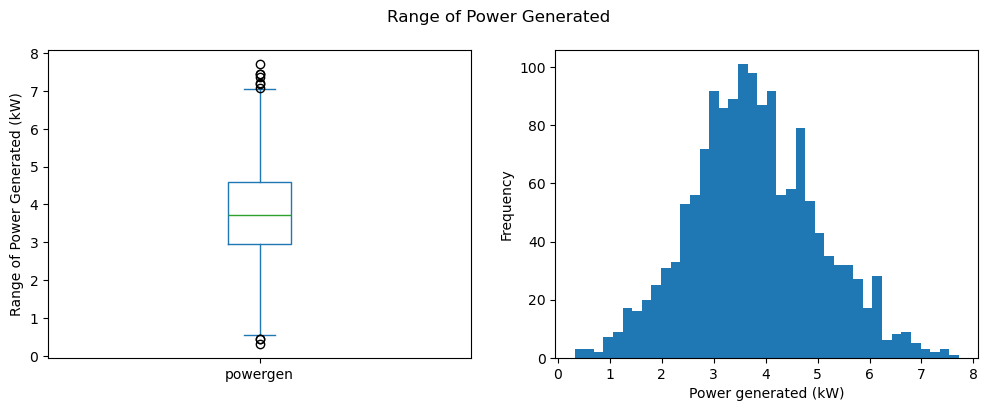

In [237]:
# visualisations
fig,ax = plt.subplots (1,2, figsize = (12,4))
fig.suptitle ('Range of Power Generated')
dfsolar ['powergen'].plot.hist(bins = 40, xlabel='Power generated (kW)', ylabel='Frequency')
dfsolar ['powergen'].plot.box(ax = ax [0], ylabel = 'Range of Power Generated (kW)')

# view interesting statistics

print ("min = ", dfsolar ['powergen'].min(), "\nmax = ", round (dfsolar ['powergen'].max(), 2), "\nmean = ", round( dfsolar ['powergen'].mean(), 2),
       "\nmedian = ", dfsolar ['powergen'].median(), "\nfirst quartile = ", round (dfsolar ['powergen'].quantile(q = 0.25), 2), 
       "\nlast quartile = ", round (dfsolar ['powergen'].quantile(q = 0.75), 2), "\nstandard deviation = ", round (dfsolar['powergen'].std(), 2), 
       "\nskew = ", round (dfsolar['powergen'].skew(), 2), "\nkurtosis = ", round (dfsolar['powergen'].kurtosis(), 2))



<b>Commentary on stats and visualisations</b>
* Numerical, continuous variable
* Power generated ranges between 0.32 and 7.71 with mean 3.78 and median 3.72.
* Mean and Median close and roughly halfway between the min and max, therefore approximate normal distribution anticipated
* Normal distribution with very slight skew as first quartile value slightly higher than expected and last quartile lower than expected
* Normal distribution with very slight skew confirmed by low skew rating of 0.182, kurtosis nearly 0, but slightly negative at -0.03 (slightly more weight to right tail of distribution) and the distribution that can be seen in the histogram
* Box plot show some outliers, slighlty more lie in the higher values

### Temp

min =  -9.8 
max =  32.1 
mean =  4.88 
median =  4.3 
first quartile =  -1.7 
last quartile =  10.17 
standard deviation =  8.16 
skew =  0.56 
kurtosis =  -0.08


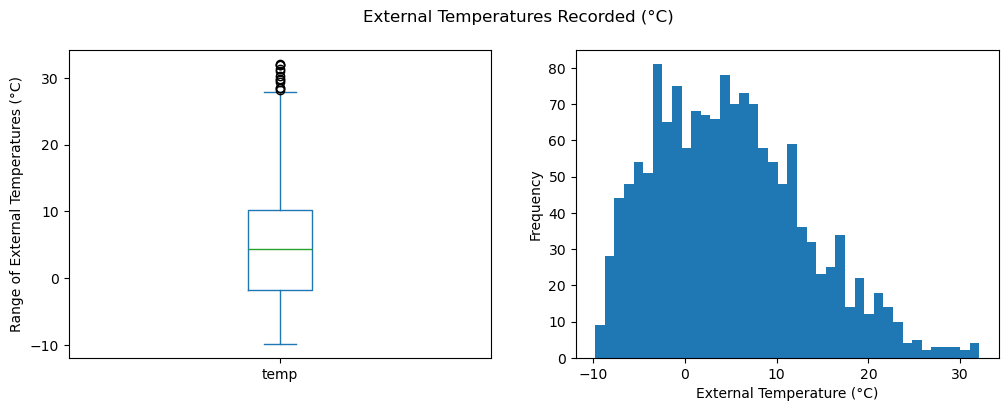

In [242]:
# visualisations
fig,ax = plt.subplots (1,2, figsize = (12,4))
fig.suptitle ('External Temperatures Recorded (\u00b0C)')
dfsolar ['temp'].plot.hist(bins = 40, xlabel='External Temperature (\u00b0C)', ylabel='Frequency')
dfsolar ['temp'].plot.box(ax = ax [0], ylabel = 'Range of External Temperatures (\u00b0C)')

# view interesting statistics

print ("min = ", dfsolar ['temp'].min(), "\nmax = ", dfsolar ['temp'].max(), "\nmean = ", round (dfsolar ['temp'].mean(), 2),
       "\nmedian = ", dfsolar ['temp'].median(), "\nfirst quartile = ", dfsolar ['temp'].quantile(q = 0.25), 
       "\nlast quartile = ", round( dfsolar ['temp'].quantile(q = 0.75), 2), "\nstandard deviation = ", round (dfsolar['temp'].std(), 2), 
       "\nskew = ", round (dfsolar['temp'].skew(), 2), "\nkurtosis = ", round (dfsolar['temp'].kurtosis(), 2))

<b>Commentary on stats and visualisations</b>
* Numerical, continuous variable
* Temperature ranges between -9.8 and 32.1 with mean 4.88 slightly greater than median at 4.3 (indicates slight positive skew).
* Mean and Median both much closer to the min rather than max value, therefore positive skewed distribution anticipated
* Relatively large skew as first quartile value and last quartile lower than expected
* Relatively large, positive skew confirmed by positive skew rating of 0.56
* Kurtosis at -0.08 which would indicate slightly more weight to right tail of distribution 
* Positive skew and weight to right tail shown in histogram
* Box plot show some outliers, slighlty more lie in the higher values

### Latitude

min =  35.0 
max =  65.0 
mean =  49.79 
median =  49.7 
first quartile =  41.6 
last quartile =  57.6 
standard deviation =  9.1 
skew =  0.02 
kurtosis =  -1.26


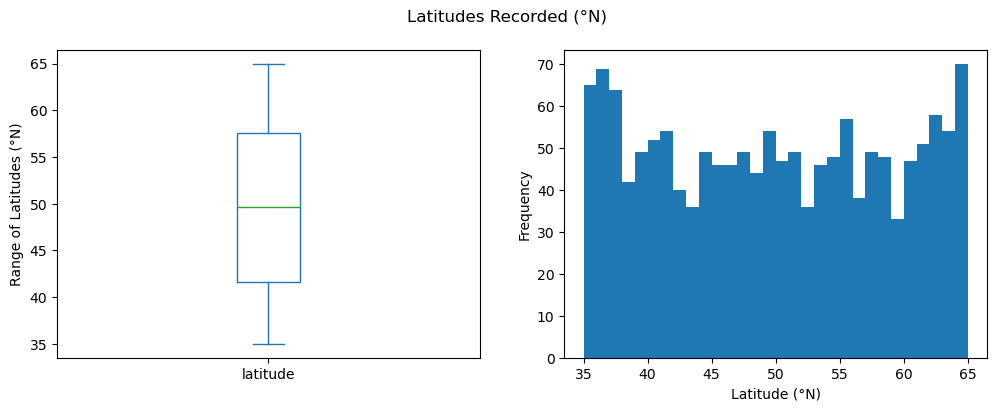

In [241]:
# visualisations
fig,ax = plt.subplots (1,2, figsize = (12,4))
fig.suptitle ('Latitudes Recorded (\u00b0N)')
dfsolar ['latitude'].plot.hist(bins = 30, xlabel='Latitude (\u00b0N)', ylabel='Frequency')
dfsolar ['latitude'].plot.box(ax = ax [0], ylabel = 'Range of Latitudes (\u00b0N)')

# view interesting statistics

print ("min = ", dfsolar ['latitude'].min(), "\nmax = ", dfsolar ['latitude'].max(), "\nmean = ", round (dfsolar ['latitude'].mean(), 2),
       "\nmedian = ", dfsolar ['latitude'].median(), "\nfirst quartile = ", dfsolar ['latitude'].quantile(q = 0.25), 
       "\nlast quartile = ", dfsolar ['latitude'].quantile(q = 0.75), "\nstandard deviation = ", round (dfsolar['latitude'].std(), 2), 
       "\nskew = ", round (dfsolar['latitude'].skew(), 2), "\nkurtosis = ", round (dfsolar['latitude'].kurtosis(), 2))

<b>Commentary on stats and visualisations</b>

* Numerical, continuous variable
* Latitudes recorded range between 35 and 65 with mean 49.79 and median 49.7 (indicates no skew)
* Mean and Median almost exactly the same and almost exactly halfway between the min and max, normal distribution could be anticipated
* Difference between last quartile and median is almost exactly equal to difference between first quartile and median, again could indicate normal distribution
* Skew rating almost zero - no skew 
* Excess kurtosis of -1.26, shows a sizable departure from normal distribution indicates flatter peak and tinner tails compared to normal distribution, potential for uniform distribution 
* Box plot shows no outliers, histogram reflects normal or slight U-shaped distribution

---
### 7. Categorical variables: 

         Snowing  Percentage
snowing                     
No          1409   94.563758
Yes           81    5.436242


<Axes: xlabel='Was Snowing Recorded?', ylabel='Percentage'>

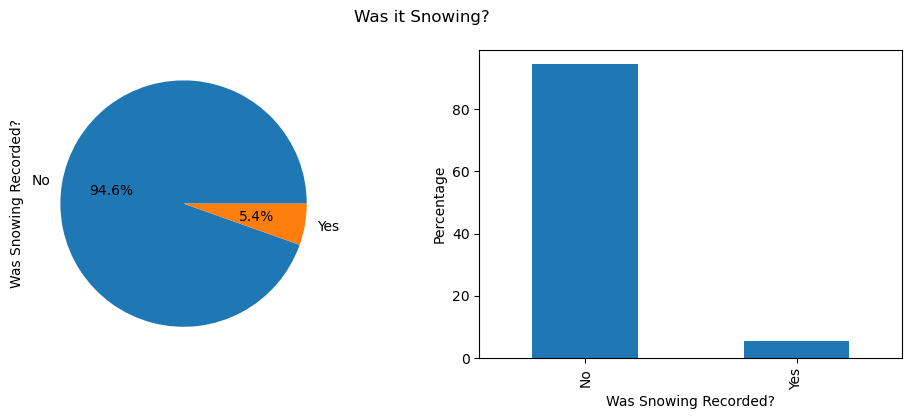

In [195]:
# Create frequency table and calculate precentage

snowtable = pd.DataFrame ({'Snowing': dfsolar['snowing'].value_counts(sort = True),
              'Percentage':100*dfsolar['snowing'].value_counts(normalize = True)})

print(snowtable)

# visualisations of these

fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.suptitle ('Was it Snowing?')
snowtable['Snowing'].plot.pie(ylabel = 'Was Snowing Recorded?', autopct = '%.1f%%', ax = ax[0])
snowtable['Percentage'].plot.bar(xlabel= 'Was Snowing Recorded?', ylabel = 'Percentage', ax = ax[1])

### Snowing

<b> Commentary on Frequency Table and Visualisations </b>

* Frequency table shows a high number and percentage of occasions of there being no snow when reading taken
* Pie chart and Bar chart both show imbalanced distribution

### Smart

       Smart  Percentage
smart                   
No       579   38.859060
Semi     523   35.100671
AI       388   26.040268


<Axes: xlabel='Panel Type', ylabel='Percentage'>

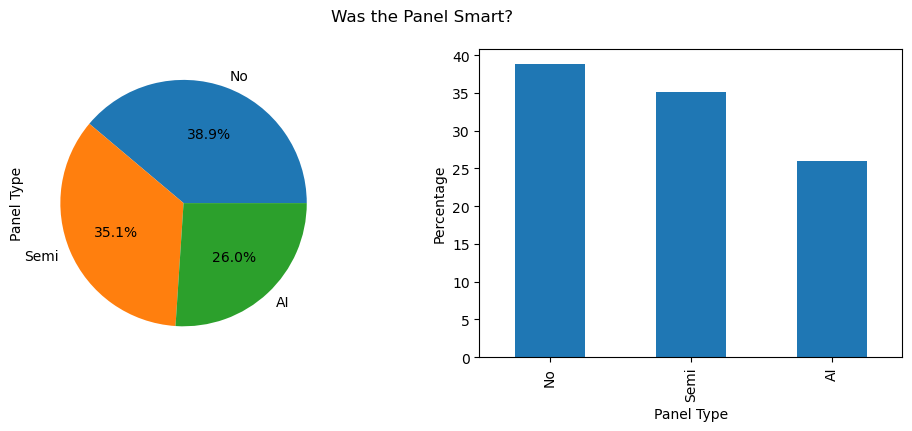

In [243]:
# Categorical, Ordinal data
# Create frequency table and calculate precentage

smarttable = pd.DataFrame ({'Smart': dfsolar['smart'].value_counts(sort = True),
              'Percentage':100*dfsolar['smart'].value_counts(normalize = True)})

print(smarttable)

# visualisations of these

fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.suptitle ('Was the Panel Smart?')
smarttable['Smart'].plot.pie(ylabel = 'Panel Type', autopct = '%.1f%%', ax = ax[0])
smarttable['Percentage'].plot.bar(xlabel= 'Panel Type', ylabel = 'Percentage', ax = ax[1])



<b> Commentary on Frequency Table and Visualisations </b>
* Frequency table shows a relatively similar number and percentage of Semi AI Panels and No AI Panels.  
* Slightly lower numbers and percentage of fully AI panels noted.
* While there is a variation in number / proportion the pie chart and bar chart show a relatively balanced distribution

---
## Bivariate analysis

Using whatever statistics, tables or visualisations you feel are most appropriate in each case, investigate:


---
### 8i). The statistics and distribution of powergen against smart type. 

,count,mean,std,min,25%,50%,75%,max
smart,,,,,,,,
AI,388.0,4.844497,1.203099,1.088,4.08575,4.889,5.70575,7.721
No,579.0,3.246860,0.992245,0.320,2.60000,3.290,3.89000,6.060
Semi,523.0,3.580501,0.978998,0.552,2.95500,3.610,4.27000,6.100


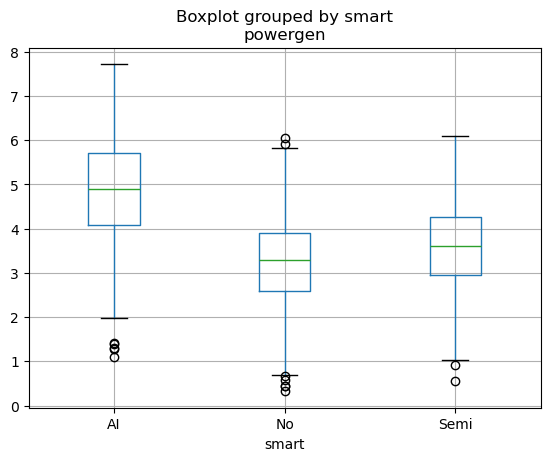

In [246]:
# view interesting statistics and visualisation

powergendist = dfsolar[['powergen', 'smart', 'latitude', 'location']]
powergendist.boxplot ('powergen', by='smart')
smartpower = powergendist.sort_values('powergen').groupby('smart')
smartpower.powergen.describe()

<b>Commentary on Statistics and Visualisation </b>
* Continuous, numerical variable and categorical, ordinal variable
* The mean value and interquartile values of power generated for No AI and Semi AI panel types are relatively similar (No AI slightly lower than Semi AI)
* The mean value and interquartile values of power generated for AI panel types is higher than that of No AI and Semi AI panel types
* Therefore it could be said that an AI panel type generates more power than No AI or Semi AI panel types

---
### 8ii). The statistics and distribution of powergen against location type.

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
rural,424.0,4.058149,1.178904,1.03,3.22,3.970,4.86175,7.454
urban,1066.0,3.669366,1.233662,0.32,2.85,3.588,4.44550,7.721


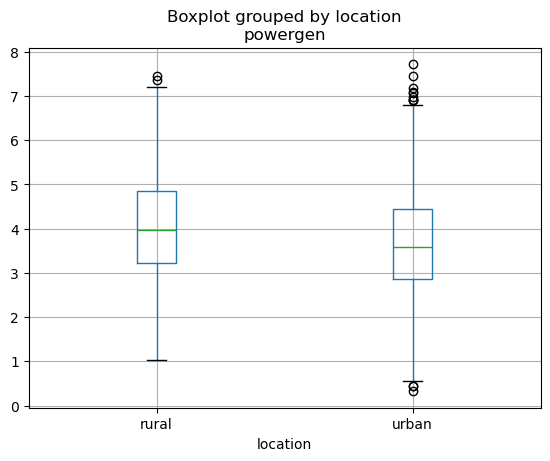

In [265]:
# view interesting statistics and visualisation

powergendist.boxplot ('powergen', by='location')
locationpower = powergendist.sort_values('powergen').groupby('location')
locationpower.powergen.describe()

<b>Commentary on Statistics and Visualisation </b>

* Continuous, numerical variable and categorical, ordinal variable
* The mean value and interquartile values of power generated in rural locations are slighlty higher than those recorded in Urban locations
* Therefore it could be said more power is generated in rural areas compared to urban areas

    <n><b> NB </b>Almost double the number of readings were taken from urban locations and a greater number of outliers are included in these readings.  The greater number of readings could generate a more accurate reflection, which may not be present for rural locations due to the more limited number of readings recorded</n>

---
### 9. How the value of powergen varies with latitude

In [199]:
# view interesting statistics

latitudepower = powergendist.sort_values('powergen').groupby('latitude')
latitudepower.powergen.describe()

,count,mean,std,min,25%,50%,75%,max
latitude,,,,,,,,
35.0,6.0,2.416667,0.803434,1.020,2.19000,2.5700,2.83750,3.350
35.1,6.0,2.678333,0.726565,1.420,2.38500,2.9400,3.18750,3.300
35.2,6.0,2.837167,0.979195,1.070,2.68425,3.0865,3.20900,3.980
35.3,6.0,2.408667,1.059477,0.752,2.01250,2.4500,2.88750,3.900
35.4,7.0,2.110000,0.549515,1.240,1.85000,2.0700,2.48000,2.800
...,...,...,...,...,...,...,...,...
64.6,11.0,4.623818,1.360239,2.101,3.96000,5.0600,5.36000,6.471
64.7,8.0,4.976875,0.781729,3.930,4.51625,4.6300,5.72625,6.055
64.8,4.0,3.799000,1.879802,1.290,3.04500,4.0900,4.84400,5.726


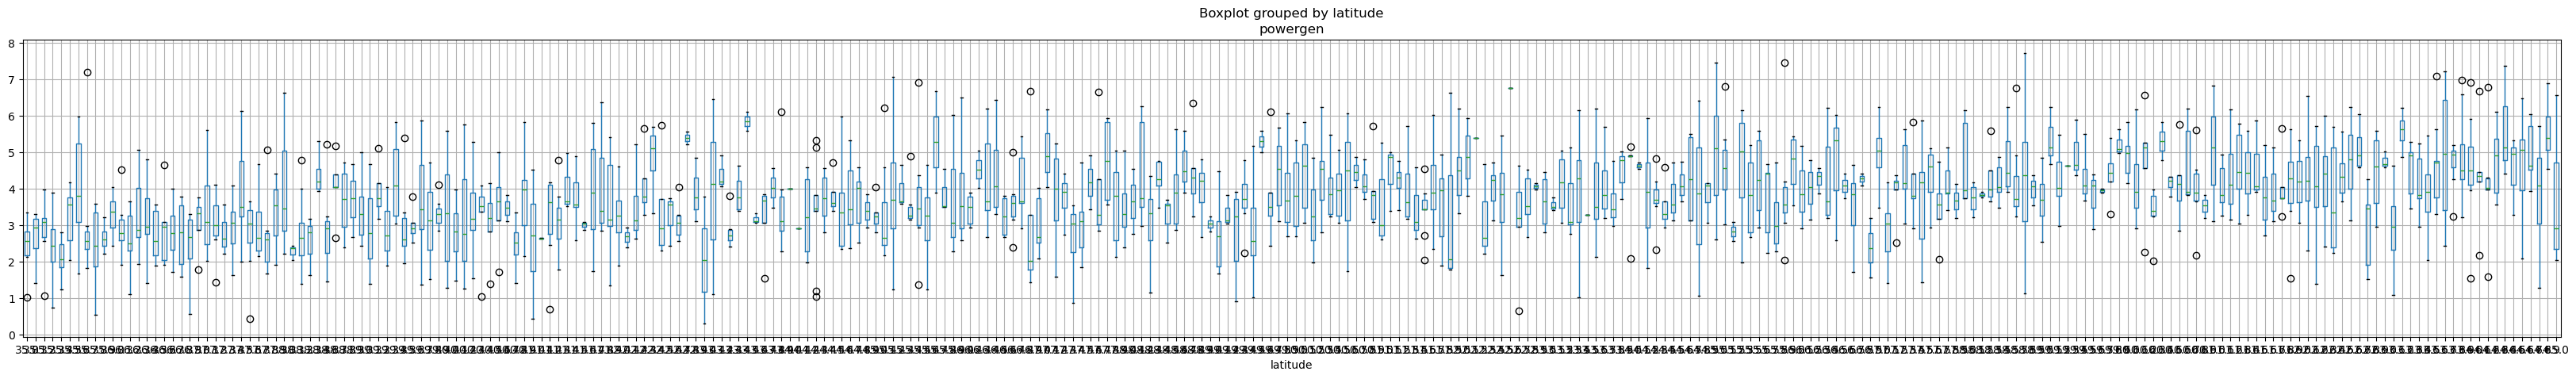

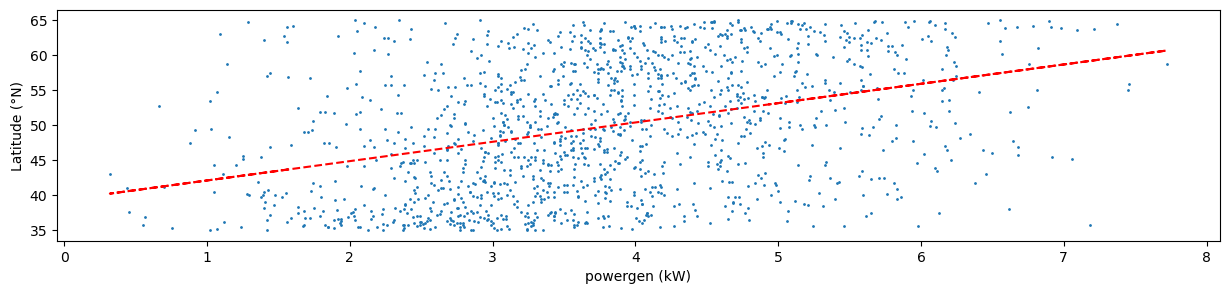

In [255]:
# view visualisation

dfsolar.boxplot('powergen', by ='latitude', figsize = (40,5))

# Potentially too messy - as latitude could be classed as continuous numerical, scatter plot may be better

dfsolar.plot.scatter(x = 'powergen', y =  'latitude', figsize = (15,3), s = 1, xlabel = 'powergen (kW)', ylabel = 'Latitude (\u00b0N)')
z = np.polyfit(dfsolar['powergen'], dfsolar['latitude'], 1)
p = np.poly1d(z)
plt.plot(dfsolar['powergen'], p(dfsolar['powergen']), "r--")

<b>Commentary on Statistics and Visualisation </b>

* It looks as though there is a very slight increase in power generated as the latitude increases (shown by the trend line on the scatterplot)

    <b>NB</b>  statistics and graph show a large variation in the values recorded at each latitude, therefore this relationship may be weak

---
### 10. How the distribution of smart varies with location


In [205]:
# create and view Cross Tabulation tables 

smartloc = pd.crosstab(dfsolar['smart'], dfsolar['location'])
print (smartloc)

location  rural  urban
smart                 
AI           97    291
No          159    420
Semi        168    355


<Axes: xlabel='Panel Type', ylabel='Number Counted'>

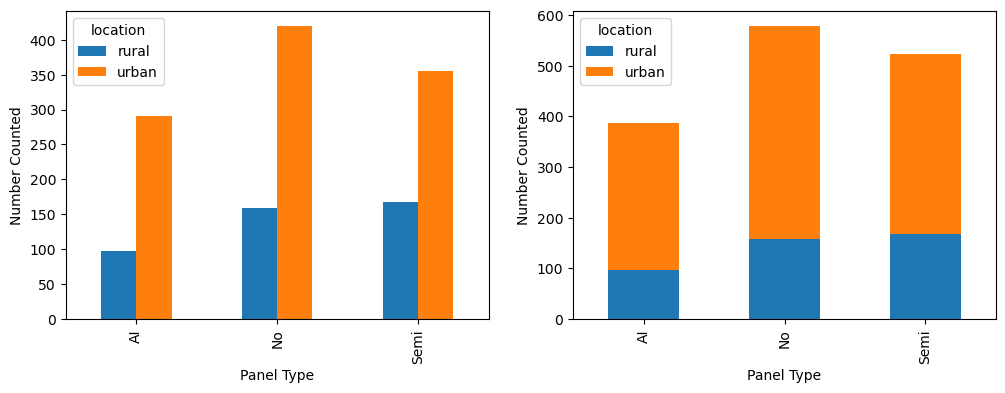

In [261]:
# create visualisation from Cross Tab Table

fig, ax = plt.subplots(1, 2, figsize=(12,4))
smartloc.plot.bar(ax = ax[0], xlabel = 'Panel Type', ylabel = 'Number Counted')
smartloc.plot.bar(stacked = True, ax = ax[1], xlabel = 'Panel Type', ylabel = 'Number Counted')


<b>Commentary on Cross Tab and Visualisation </b> 

* Categorical variable and categorical, ordinal variable
* In both rural and urban areas the proportion of AI panels are lower compared to that of No AI or Semi AI
* The most common panel type in rural areas are semi AI
* The most common panel type in urban areas are No AI
* More AI panels are present in urban areas compared to rural areas

<b>NB</b> Almost double the number of readings were taken from urban locations. The greater number of readings could generate a more accurate reflection, which may not be present for rural locations due to the more limited number of readings recorded.

---
### 11. The change in temp against date


<Axes: xlabel='Date', ylabel='Temperature (°C)'>

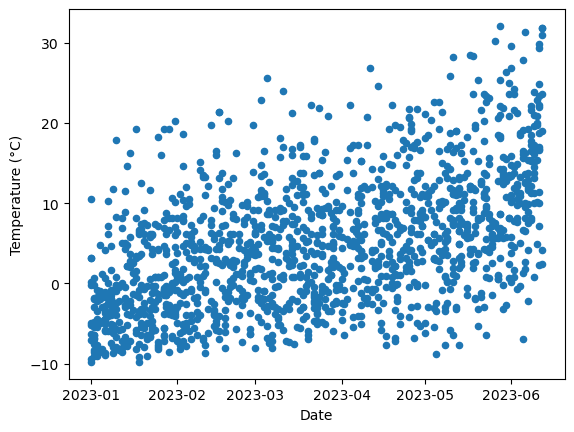

In [266]:
# create visualisation 
dfsolar.plot.scatter (x ='date', y = 'temp', xlabel = 'Date', ylabel = 'Temperature (\u00b0C)')


<b> Commentary on Visualisation </b>

* Two continuous, numerical variables
* Temperature does seem to have some correlation with date
* The temperature recorded does seem to increase slightly as the date progresses

---
### 12. Identify 5 variables that in your view have a significant impact on the value of powergen based on the evidence in this dataset. Justify your choice.

/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dross/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Pearson Correlation betweem Temperature and Power Generated is  0.22849716053038613
Pearson Correlation betweem Cloud Cover and Power Generated is  -0.347997518650851


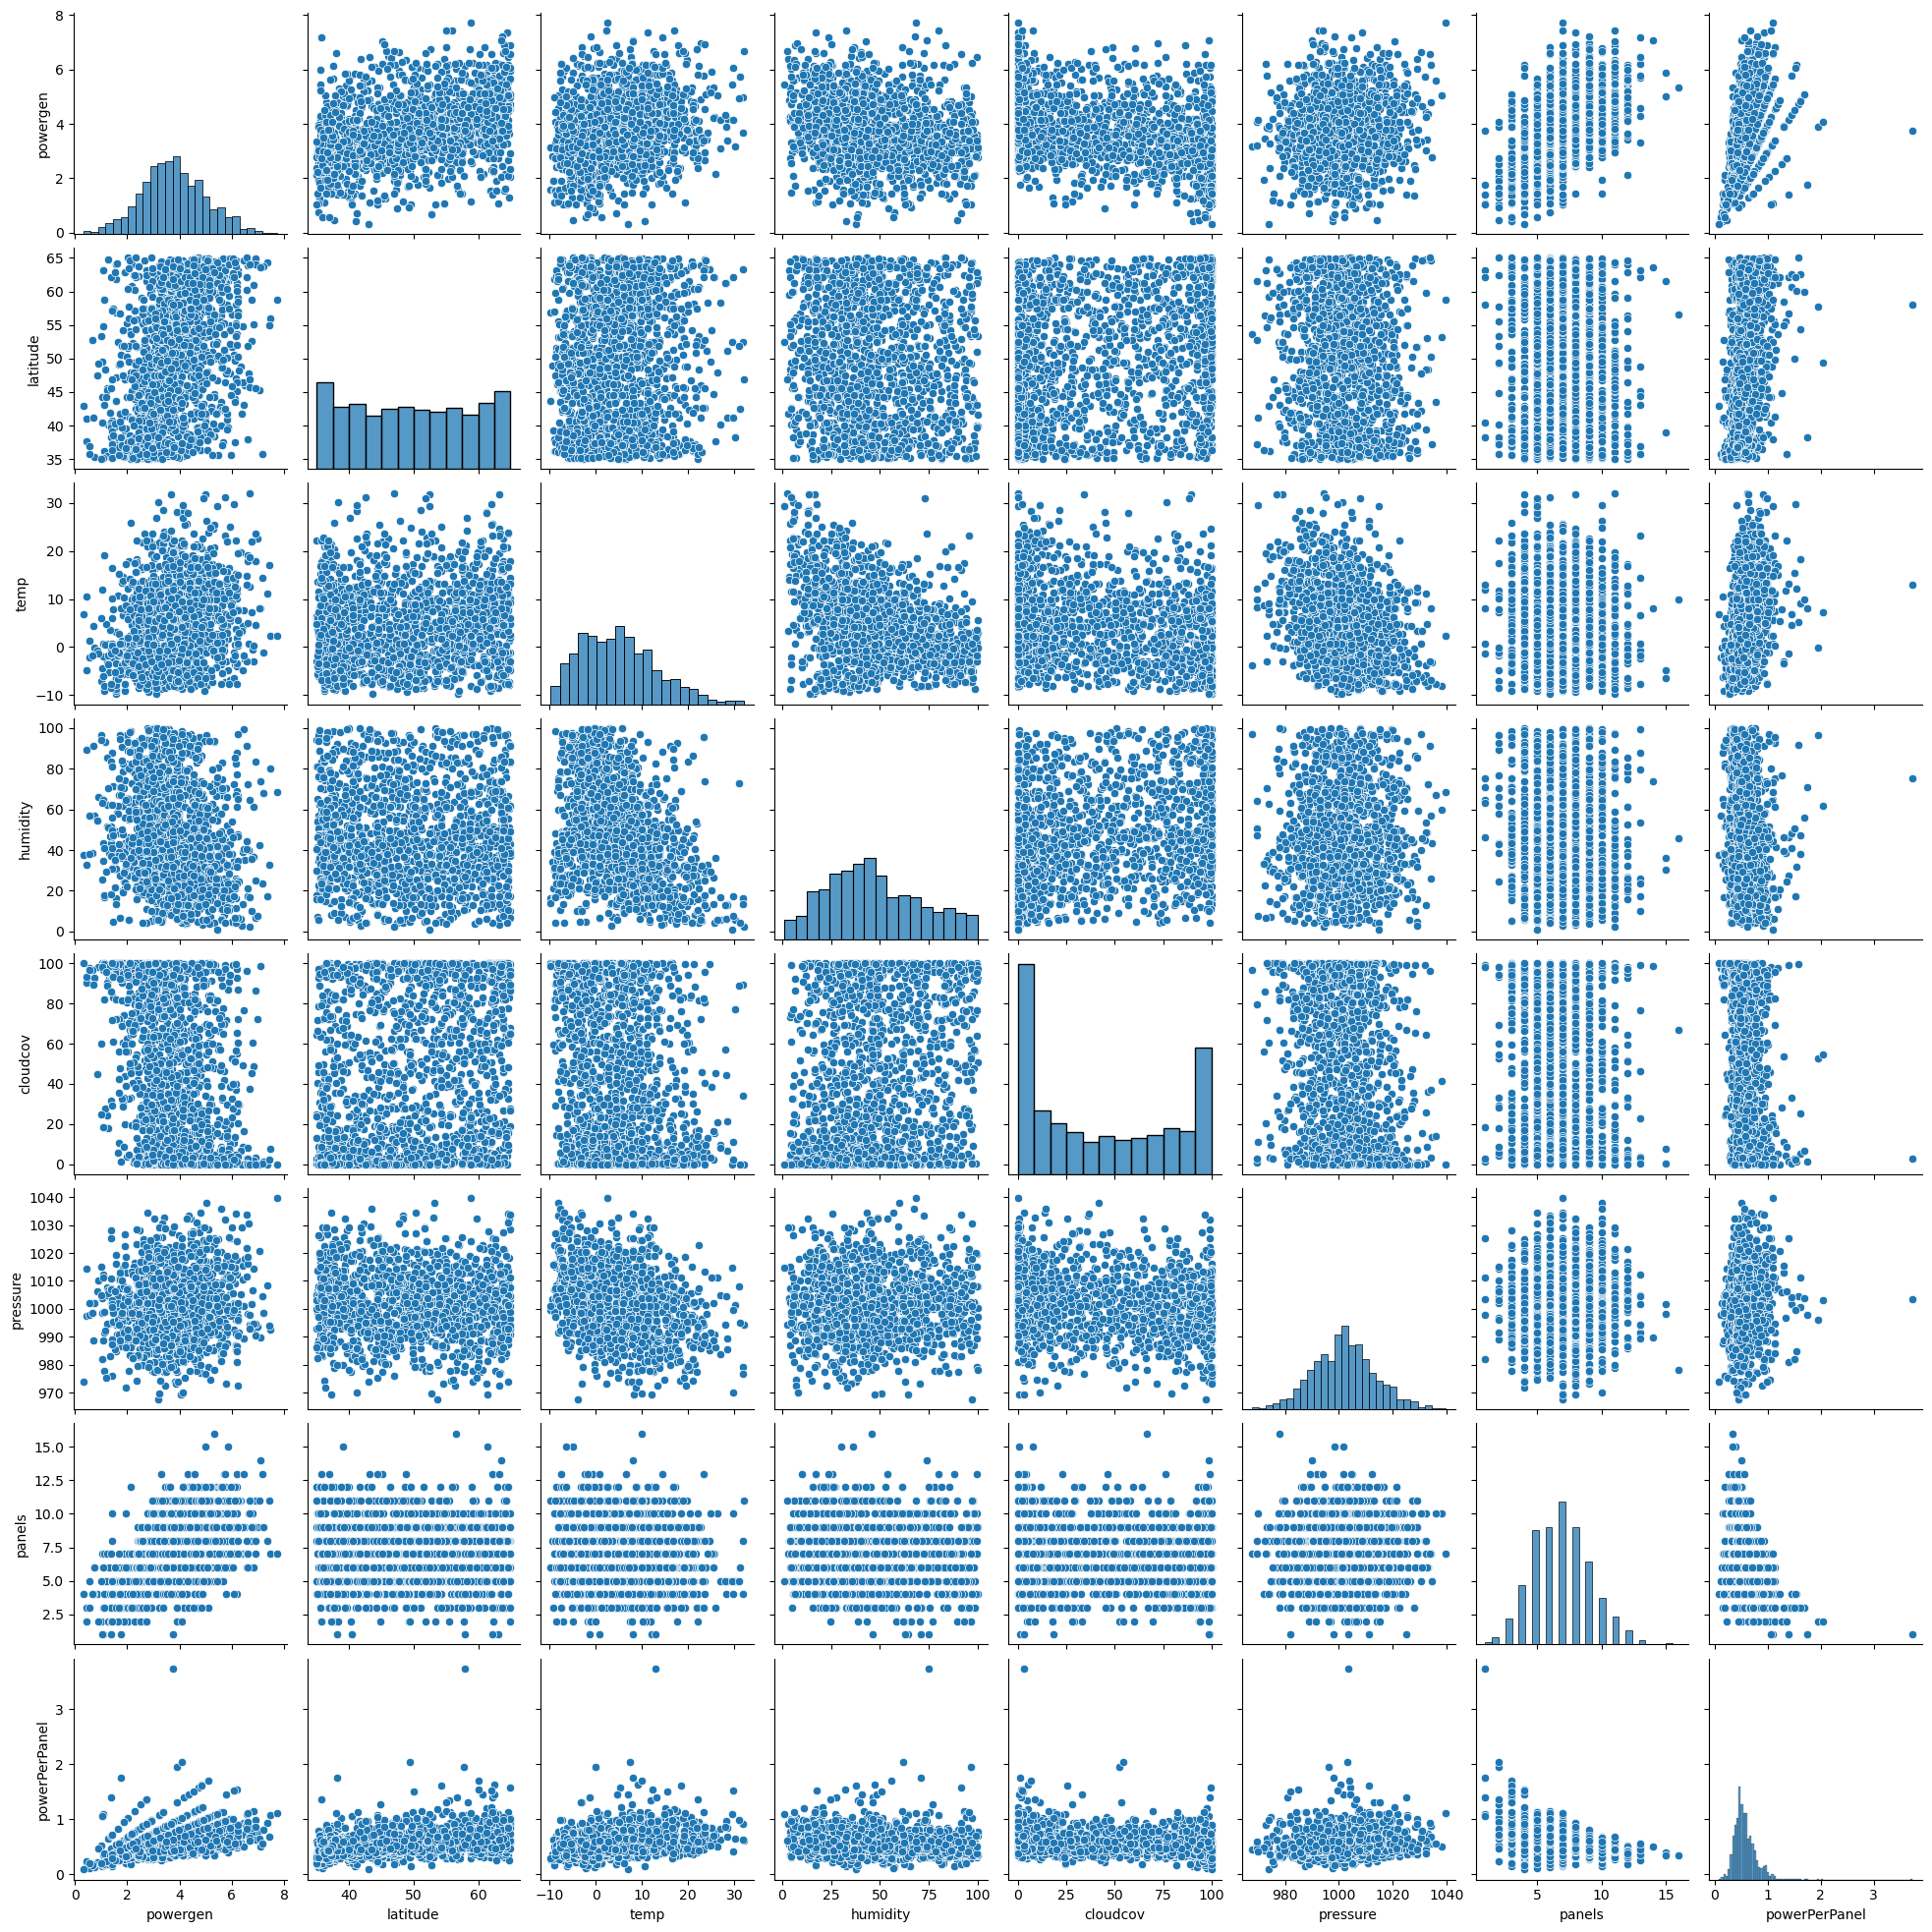

In [220]:
# create visualisation for numerical variables

display (seaborn.pairplot(dfsolar))


# add statistical test - referred to in justification section below
print ("Pearson Correlation betweem Temperature and Power Generated is ", dfsolar.temp.corr(dfsolar['powergen']))
print ("Pearson Correlation betweem Cloud Cover and Power Generated is ", dfsolar.cloudcov.corr(dfsolar['powergen']))



Pearson Correlation betweem Date and Power Generated is  0.4870895667394372


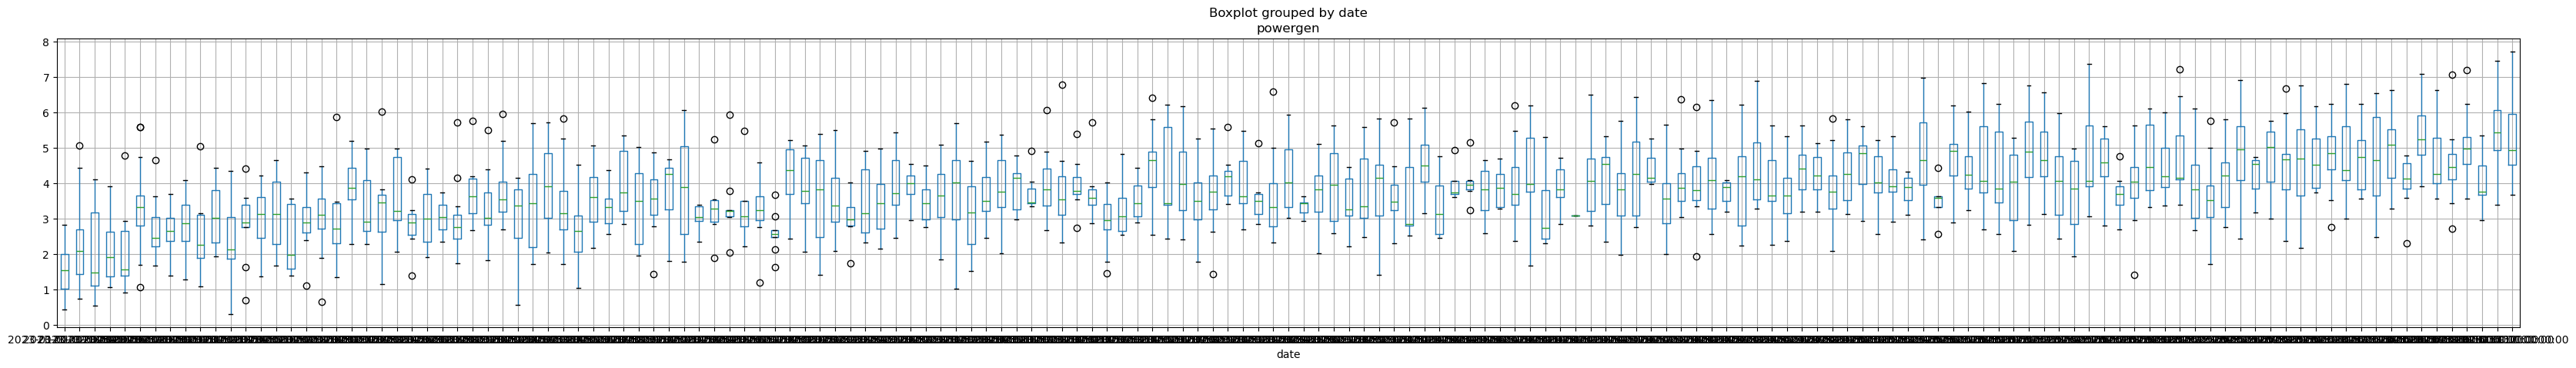

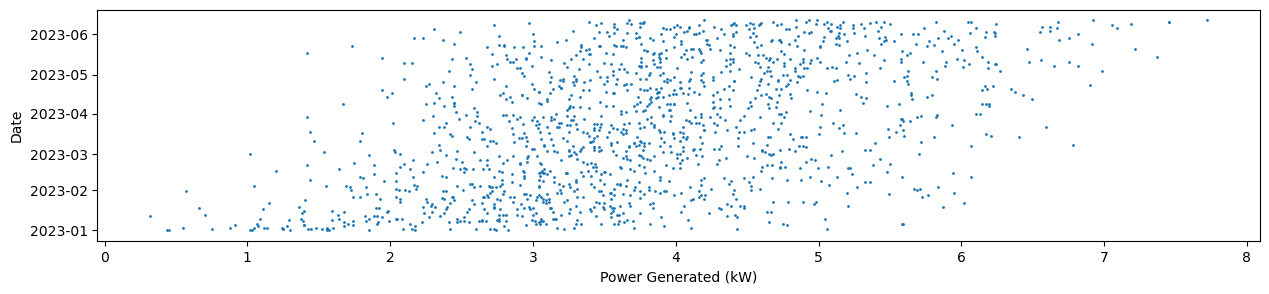

In [268]:
# create visualisation for date, which has not been included in pairplot

powergendate = dfsolar[['powergen', 'date']]
powergendate.boxplot ('powergen', by= 'date', figsize = (40,5))
datepower = powergendate.sort_values('powergen').groupby('date')
datepower.powergen.describe()


# box plot looks quite overwhelming - potential for scatter plot to be better visualisation

dfsolar.plot.scatter(x = 'powergen', y =  'date', figsize = (15,3), s = 1, xlabel = 'Power Generated (kW)', ylabel = 'Date')


# add statistical test - referred to in justification section below

print ("Pearson Correlation betweem Date and Power Generated is ", dfsolar.date.corr(dfsolar['powergen']))

,count,mean,std,min,25%,50%,75%,max
snowing,,,,,,,,
No,1409.0,3.890799,1.159344,0.320,3.070,3.780,4.650,7.721
Yes,81.0,1.852630,0.741078,0.451,1.391,1.791,2.237,4.481


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Yes-No,-2.03817,0.130344,-15.636857,3.806986e-51,-2.293847,-1.782492,3.806986e-51,True


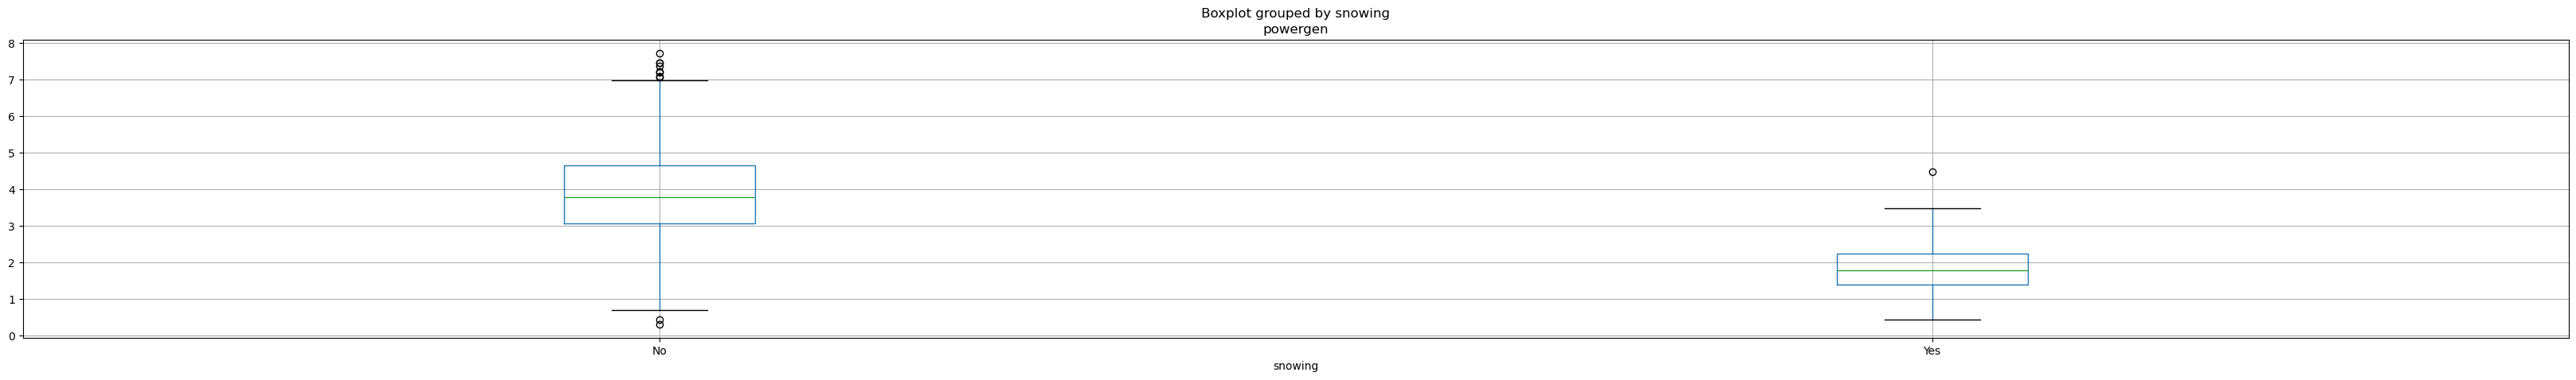

In [223]:
# view interesting statistics and visualisation for powergenerated against snow, which has not been included in pairplot

powergensnow = dfsolar[['powergen', 'snowing']]
powergensnow.boxplot ('powergen', by= 'snowing', figsize = (40,5))
snowpower = powergensnow.sort_values('powergen').groupby('snowing')
display (snowpower.powergen.describe())


# add statistical test - referred to in justification section below

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('powergen ~ snowing', data=powergensnow).fit()
pair_t = model.t_test_pairwise('snowing') 
display (pair_t.result_frame)

,count,mean,std,min,25%,50%,75%,max
panels,,,,,,,,
1,5.0,1.804600,1.115878,1.050,1.0880,1.3990,1.75000,3.736
2,15.0,2.017867,1.040425,0.451,1.3385,1.8900,2.61000,4.076
3,51.0,2.628549,1.111822,0.440,1.8700,2.5200,3.23500,5.093
4,116.0,2.957879,1.057178,0.320,2.3075,2.9550,3.68750,6.176
5,222.0,3.152599,1.012875,0.552,2.4500,3.0645,3.76000,5.665
6,228.0,3.564154,1.113268,0.752,2.8775,3.4550,4.28375,6.815
7,278.0,3.847669,1.118460,1.030,3.1425,3.7500,4.47000,7.721
8,229.0,4.109830,1.019476,1.439,3.3300,3.9200,4.74000,7.372
9,162.0,4.431395,1.000072,2.400,3.7175,4.2350,5.09675,7.213


Spearman Correlation betweem Number of Panels and Power Generated is  0.5045781381537086


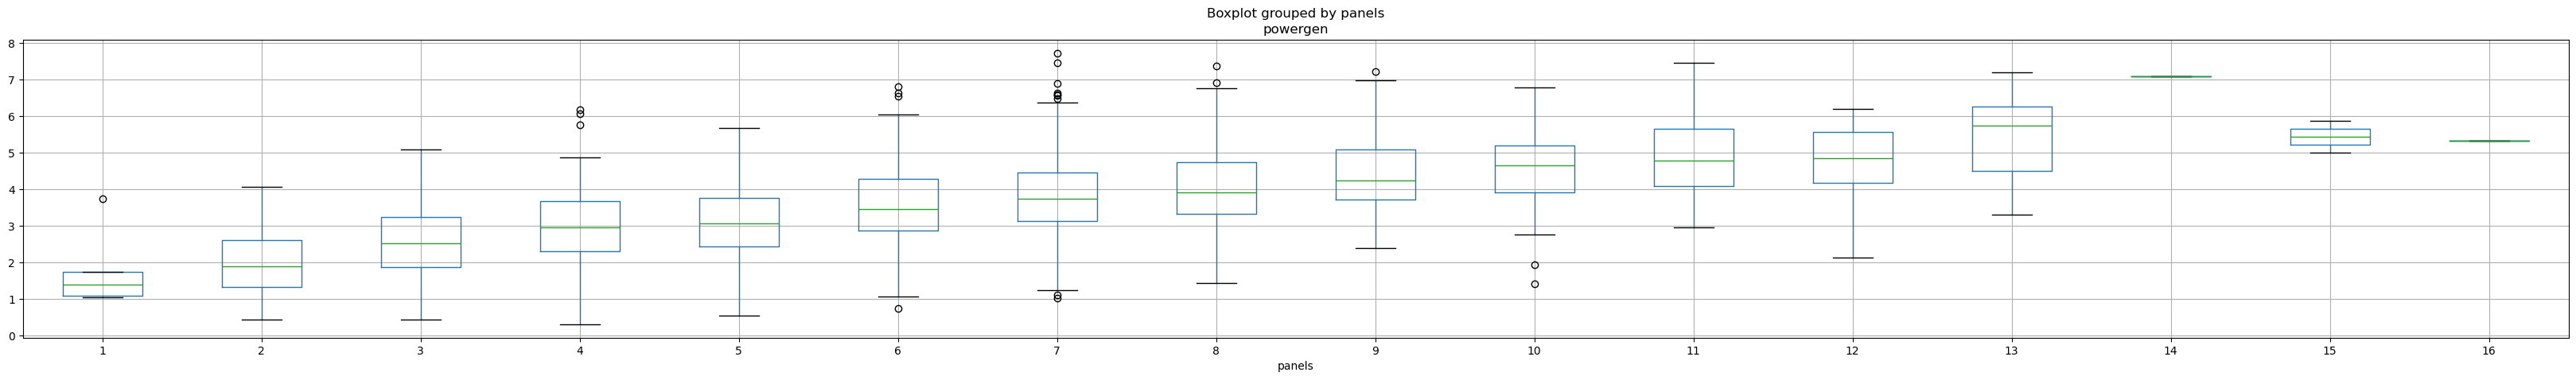

In [224]:
# view interesting statistics for powergenerated against number of panels - revisualised for clarity 

powergenpanels = dfsolar[['powergen', 'panels']]
powergenpanels.boxplot ('powergen', by= 'panels', figsize = (40,5))
panelpower = powergenpanels.sort_values('powergen').groupby('panels')
display (panelpower.powergen.describe())


# add statistical test - referred to in justification section below

print ("Spearman Correlation betweem Number of Panels and Power Generated is ", dfsolar.panels.corr(dfsolar['powergen'], method = "spearman"))

<b> Identification of 5 variables and justification </b>

The following look as though there could be a correlation with Power Generated:

<b>Temperature </b>
<p>
* Visually - the scatter plot looks as though it may reflect a very slight increase in power generation as temperature increases.
<p> * Pearson Correlation value is slightly higher than 0, so there could potentially be some positive correlation - but it would appear to be minimal.
<p>

<b>Cloucov</b>
<p>
* Visually - the scatter plot may reflect a slight decrease in power generation as cloud cover increases.
<p> * Pearson Correlation value is slightly lower than 0, which suggests there could potentially be some negative correlation - but it would appear to be minimal.
<p>

<b>Date </b>
<p>
* Visually - the scatter plot may reflect a slight increase in power generation as date increases.
<p> * Pearson Correlation value is slightly higher than 0, so there could potentially be some positive correlation - but it would appear to be minimal (slighlty more than Temperature).
<p>

<b>Snowing</b>
<p>
* Visually - the box plot shows greater mean value for power generated, in addition to an increased distribution to higher levels of power generation when it has not been snowing. It would look as though snow has a negative impact on power generation.
<p> * The Pairwise T-test presents a P value well below 0.05%, which would suggest this has a significant influence on power generated. 
<p> However, confidence intervals are not equal to 0, which would indicate there is not enough evidence to fully support this.  The box plot indicates the distribution is fairly normal in both categories, therefore this could be down to the number of outliers, particularly in the 'No' group.
<p>

<b>Number of Panels</b>
<p>
* Visually - the box plot show a greater value of power generated when the number of panels present increases.
<p> * Spearman Correlation value is halfway between 0 and 1, which would indicate some positive correlation (slighlty more than Date and more than Temperature).
<p>


---
## Data Modelling Tasks:

---
### 13(i). Create a new data frame warmAI that consists of only those rows from solar where the value of smart is AI and temp is greater than 15.

In [269]:
# Filter data first

warmAI=pd.DataFrame(dfsolar[dfsolar['smart']=='AI'])
warmAI2=pd.DataFrame(warmAI[warmAI['temp']>15])
print(warmAI2)

      powergen  latitude  temp  humidity  cloudcov  pressure  panels  \
311      3.857      60.7  20.3     28.80      83.0     978.0       4   
396      4.781      61.2  15.1     10.98      97.7    1007.1       4   
446      5.478      62.2  16.0     14.31       0.2     996.5       7   
462      3.061      37.2  21.4      8.34       8.0    1001.1       4   
463      3.386      37.2  21.4      8.34       8.0    1001.1       4   
...        ...       ...   ...       ...       ...       ...     ...   
1503     7.452      55.0  17.0     32.70       2.3     994.1      11   
1504     6.068      62.1  29.8     17.52       2.2     999.5       4   
1508     4.682      39.1  16.7     89.76      97.9     999.8       8   
1514     6.919      45.5  23.6     25.26       0.0     990.5       8   
1515     4.931      51.8  31.0     72.81      88.6    1007.9       5   

           date location snowing smart  powerPerPanel month  
311  2023-01-31    urban      No    AI          0.964   Jan  
396  2023-0

---

### 13. (ii) Perform a single-variable linear regression analysis aimed at predicting powergenusing latitude

• firstly, using the full solar dataset

• secondly, using the filtered warmAI dataset.

Compare the two linear regression models obtained.

In [270]:
# single-variable linear regression analysis using full solar dataset

from statsmodels.formula.api import ols

linearmodel = ols ("powergen ~ latitude", data = dfsolar).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               powergen   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     241.2
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           1.58e-50
Time:                        09:38:18   Log-Likelihood:                -2310.9
No. Observations:                1490   AIC:                             4626.
Df Residuals:                    1488   BIC:                             4636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2654      0.165      7.688      0.000       0.943       1.588
latitude       0.0505      0.003     15.531      0.000       0.044       0.057
==============================================================================
Omnibus:                       15.509   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.898
Skew:                           0.200   Prob(JB):                     0.000214
Kurtosis:                       3.336   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

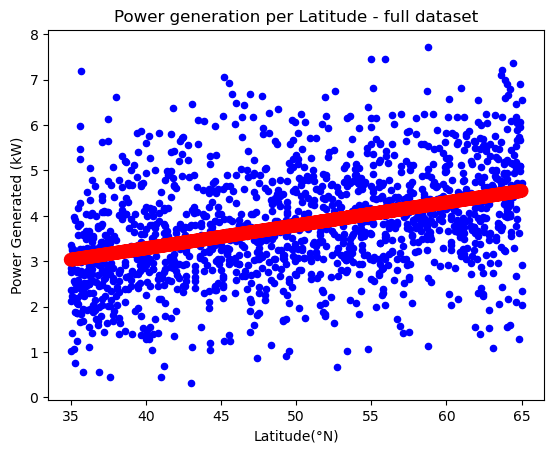

In [271]:
# visualiation of single-variable linear regression

ax = dfsolar.plot.scatter(x='latitude', y='powergen', c = 'blue', title = 'Power generation per Latitude - full dataset',
                          xlabel = 'Latitude(\u00b0N)', ylabel = 'Power Generated (kW)')
fittedline = linearmodel.predict()
ax.plot(dfsolar['latitude'], fittedline, c = 'red', linewidth = 10)

In [233]:
# single-variable linear regression analysis using filtered solar dataset

linearmodel2 = ols ("powergen ~ latitude", data = warmAI2).fit()
linearmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               powergen   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     8.089
Date:                Thu, 15 Feb 2024   Prob (F-statistic):            0.00611
Time:                        18:40:38   Log-Likelihood:                -82.880
No. Observations:                  61   AIC:                             169.8
Df Residuals:                      59   BIC:                             174.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0865      0.761      4.057      0.000       1.564       4.609
latitude       0.0419      0.015      2.844      0.006       0.012       0.071
==============================================================================
Omnibus:                        2.332   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.056
Skew:                           0.339   Prob(JB):                        0.358
Kurtosis:                       2.409   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

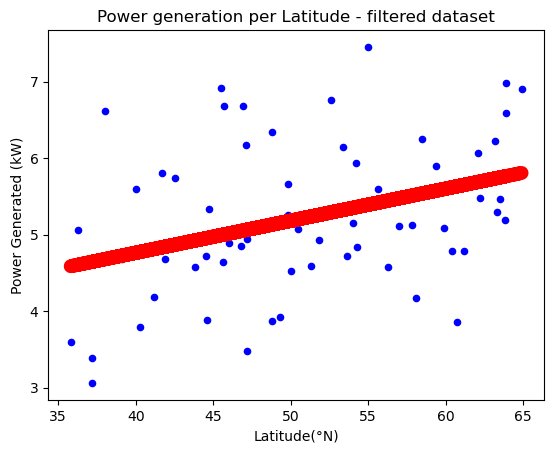

In [272]:
# visualiation of single-variable linear regression using filtered dataset

ax = warmAI2.plot.scatter(x='latitude', y='powergen', c = 'blue', title = 'Power generation per Latitude - filtered dataset',
                         xlabel = 'Latitude(\u00b0N)', ylabel = 'Power Generated (kW)')
fittedline = linearmodel2.predict()
ax.plot(warmAI2['latitude'], fittedline, c = 'red', linewidth = 10)

<b> Compare two linear regression models obtained </b>

Power generation per Latitude - full dataset
* Visually - there would appear to be a slight increase in power generated with latitude, with a concentration of values between 1.5 and 5 kW.  The best line of fit relfects this.

* P no = 0, which would suggest latitude has a significant effect on power generated.  However, the $R^2$ value is low at 0.139, which would indicate only 13% of the variation would be explained by latitude.

Power generation per Latitude - filtered dataset
* Visually - there would appear to be a slight increase in power generated with latitude (although this is less clear than the previous scatter plot).  The best line of fit relfects the slight increase.  There is now no concentration of values between 1.5 and 5 kW.
* P no = 0.006, which would suggest latitude still has a significant effect on power generated.  However, slightly less than reported by the full dataset.  The $R^2$ value is lower at 0.121, which would indicate only 12.1% of the variation would be explained by latitude.



---
### 14. Using the full solar dataset construct and evaluate a multi-variable linear regression model to predict powergen.

You may select any number of variables as predictors (probably referring to question 12).

Justify the variables that you choose to include as predictors in the model, and assess the overall model performance.

In [235]:
multimodel = ols("powergen ~ panels+temp+snowing+cloudcov+smart+latitude", data=dfsolar).fit()
display (multimodel.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               powergen   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1208.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:06:47   Log-Likelihood:                -1004.9
No. Observations:                1490   AIC:                             2026.
Df Residuals:                    1482   BIC:                             2068.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8924      0.082     10.838      0.000       0.731       1.054
snowing[T.Yes]    -1.1563      0.059    -19.680      0.000      -1.272      -1.041
smart[T.No]       -1.5756      0.031    -50.303      0.000      -1.637      -1.514
smart[T.Semi]     -1.2175      0.032    -38.063      0.000      -1.280      -1.155
panels             0.2425      0.006     41.660      0.000       0.231       0.254
temp               0.0167      0.002     10.322      0.000       0.014       0.020
cloudcov          -0.0101      0.000    -27.482      0.000      -0.011      -0.009
latitude           0.0535      0.001     38.170      0.000       0.051       0.056
==============================================================================
Omnibus:                       29.031   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.688
Skew:                           0.083   Prob(JB):                     1.33e-12
Kurtosis:                       3.924   Cond. No.                         488.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Observations and Rationale </b>

I selected panels, temperature, snowing and cloud cover as I felt these had some impact on Power Generated.  
(I did not use Date as it was looking very odd and I did not know what to do with it)

P-values are all less than 0.05 so all appear statistically significant to the model.

The co-efficient determination $R^2$ is 0.334, so the model explains 33.4% of the variation in powergen from No. Panels and Temperature

When adding in smart - the $R^2$ value increases to 0.704
When adding in latitude - the $R^2$ value increases to 0.851

There is high potential that there is some relationship between the variables that is having an effect on power generated.  This could explain the reason the model (and the linear regression with latitude above) is showing variables are having a significant effect, but only explaining a small percentage when fewer variables are included.